<h1>Bodyweight Analysis using Python</h1>
<hr>
<br>
This is an analysis of over a year of collected data from my macro tracking. I am using this to practice my python skills using libraries like Pandas, NumPy, Matplotlib and more. As a powerlifter it is important to track data so I know I am making progress and <b> WHY </b> I am making progress. Nutrition plays a major role in how I perform in the gym and on the platform. This is the first time I am analyzing this data using visuals and making conclusions based off of what I see.

<h3>Imported Libraries</h3>
<br>
Started by importing the libraries I need

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode,plot, iplot

In [2]:
init_notebook_mode(connected = True)

In [3]:
cf.go_offline()

<h3>Imported Data</h3>
<br>
Of course, can't analyze data without the data! The data is submitted using google sheets, which I have downloaded as an Excel file for now. In the future I hope to automate this process somehow, but for now this is great for practicing.

In [4]:
bodycomp_df = pd.read_excel('PHAMISHED Coaching - Zach Hubbell (1).xlsx', header = 2)

<h2> Semi Clean Data for Reference

In [5]:
bodycomp_df_unclean  = pd.read_excel('PHAMISHED Coaching - Zach Hubbell (1).xlsx', header = 2)
bodycomp_df_unclean.columns = bodycomp_df_unclean.columns.str.replace("'"," ")
del bodycomp_df_unclean['Coach s Comments']
del bodycomp_df_unclean['Client Comments:\nFeel free to make notes in this column (how training is going, stressful week, cheat meal, bloated, sickness, family event, exam week, etc)']

In [6]:
bodycomp_df_unclean

,Date,Weight (lb/kg),Calories,Carb,Fat,Protein,Eat Out (Y/N)?,Hours of quality sleep,Goal Calories,Carb.1,Fat.1,Protein.1
0,2021-07-03 00:00:00,210.0,3400.0,405.0,100.0,200.0,N,5.0,3400,405.0,100.0,220.0
1,2021-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3400,405.0,100.0,220.0
2,2021-07-05 00:00:00,214.4,NaN,NaN,NaN,NaN,NaN,3.0,3400,405.0,100.0,220.0
3,2021-07-06 00:00:00,211.8,3131.0,165.2,168.7,231.0,N,1.0,3400,405.0,100.0,220.0
4,2021-07-07 00:00:00,NaN,4019.0,361.0,189.0,207.0,N,4.0,3400,405.0,100.0,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...
515,2022-09-27 00:00:00,225.8,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN
516,2022-09-28 00:00:00,224.2,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN
517,2022-09-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
518,2022-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h2>Cleaning the Data</h2>
<br>
Dropping columns and moving rows to make a better looking Data Frame

In [7]:
bodycomp_df.columns = bodycomp_df.columns.str.replace("'"," ")

In [8]:
del bodycomp_df['Coach s Comments']

In [9]:
del bodycomp_df['Client Comments:\nFeel free to make notes in this column (how training is going, stressful week, cheat meal, bloated, sickness, family event, exam week, etc)']

In [10]:
bodycomp_df

,Date,Weight (lb/kg),Calories,Carb,Fat,Protein,Eat Out (Y/N)?,Hours of quality sleep,Goal Calories,Carb.1,Fat.1,Protein.1
0,2021-07-03 00:00:00,210.0,3400.0,405.0,100.0,200.0,N,5.0,3400,405.0,100.0,220.0
1,2021-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3400,405.0,100.0,220.0
2,2021-07-05 00:00:00,214.4,NaN,NaN,NaN,NaN,NaN,3.0,3400,405.0,100.0,220.0
3,2021-07-06 00:00:00,211.8,3131.0,165.2,168.7,231.0,N,1.0,3400,405.0,100.0,220.0
4,2021-07-07 00:00:00,NaN,4019.0,361.0,189.0,207.0,N,4.0,3400,405.0,100.0,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...
515,2022-09-27 00:00:00,225.8,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN
516,2022-09-28 00:00:00,224.2,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN
517,2022-09-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
518,2022-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h3> Replace Headers </h3>

In [11]:
bodycomp_df.rename(columns = {'Calories':'Tracked Calories', 'Carb':'Tracked Carb', 'Fat':'Tracked Fat', 'Protein':'Tracked Protein', 'Carb.1':'Goal Carb','Fat.1':'Goal Fat','Protein.1':'Goal Protein'}, inplace = True)

In [12]:
bodycomp_df

,Date,Weight (lb/kg),Tracked Calories,Tracked Carb,Tracked Fat,Tracked Protein,Eat Out (Y/N)?,Hours of quality sleep,Goal Calories,Goal Carb,Goal Fat,Goal Protein
0,2021-07-03 00:00:00,210.0,3400.0,405.0,100.0,200.0,N,5.0,3400,405.0,100.0,220.0
1,2021-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3400,405.0,100.0,220.0
2,2021-07-05 00:00:00,214.4,NaN,NaN,NaN,NaN,NaN,3.0,3400,405.0,100.0,220.0
3,2021-07-06 00:00:00,211.8,3131.0,165.2,168.7,231.0,N,1.0,3400,405.0,100.0,220.0
4,2021-07-07 00:00:00,NaN,4019.0,361.0,189.0,207.0,N,4.0,3400,405.0,100.0,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...
515,2022-09-27 00:00:00,225.8,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN
516,2022-09-28 00:00:00,224.2,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN
517,2022-09-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
518,2022-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h3> Dropped Missing Data</h3>
<br>
I wanted to analyze data that I only tracked everything for. I feel as if it gives me a full picture and less variables to account for. There is definitely data I will be missing because of this, specially in the bodyweight section.

In [13]:
bodycomp_df.dropna(inplace = True)

<h3>Dropping rows from excel that showed "#DIV/0!"

In [14]:
bodycomp_df = bodycomp_df[bodycomp_df != '#DIV/0!']

In [15]:
bodycomp_df

,Date,Weight (lb/kg),Tracked Calories,Tracked Carb,Tracked Fat,Tracked Protein,Eat Out (Y/N)?,Hours of quality sleep,Goal Calories,Goal Carb,Goal Fat,Goal Protein
0,2021-07-03 00:00:00,210.0,3400.0,405.0,100.0,200.0,N,5.0,3400,405.0,100.0,220.0
3,2021-07-06 00:00:00,211.8,3131.0,165.2,168.7,231.0,N,1.0,3400,405.0,100.0,220.0
9,2021-07-11 00:00:00,214.0,2930.0,388.0,62.0,207.0,N,2.0,3400,405.0,100.0,220.0
10,2021-07-12 00:00:00,213.0,3416.0,402.0,102.0,228.0,N,1.0,3400,405.0,100.0,220.0
11,2021-07-13 00:00:00,213.4,3383.0,339.0,153.0,178.0,Y,3.0,3400,405.0,100.0,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...
485,2022-09-01 00:00:00,224.4,3315.0,395.0,87.0,240.0,N,9.0,3400,380.0,100.0,245.0
486,2022-09-02 00:00:00,224.0,3554.0,396.0,98.0,273.0,N,7.0,3400,380.0,100.0,245.0
490,2022-09-05 00:00:00,224.4,2802.0,367.0,60.0,209.0,N,8.0,3400,380.0,100.0,245.0
491,2022-09-06 00:00:00,223.5,3269.0,433.0,59.0,260.0,N,6.0,3400,380.0,100.0,245.0


<h3>Dropping some values in "Hours of quality sleep" column due to inaccurate data</h3>
<br>
That column changed names sometime well after I started macro tracking. I know I did not have anything less than 3ish hours of sleep a night

In [16]:
bodycomp_df['Hours of quality sleep'] = pd.to_numeric(bodycomp_df['Hours of quality sleep'])
bodycomp_df_clean = bodycomp_df.loc[bodycomp_df['Hours of quality sleep'] > 3]

In [17]:
bodycomp_df_clean

,Date,Weight (lb/kg),Tracked Calories,Tracked Carb,Tracked Fat,Tracked Protein,Eat Out (Y/N)?,Hours of quality sleep,Goal Calories,Goal Carb,Goal Fat,Goal Protein
0,2021-07-03 00:00:00,210.0,3400.0,405.0,100.0,200.0,N,5.0,3400,405.0,100.0,220.0
14,2021-07-16 00:00:00,212.2,3102.0,399.0,80.0,208.0,N,4.0,3400,405.0,100.0,220.0
17,2021-07-18 00:00:00,211.6,3337.0,381.0,97.0,203.0,N,4.0,3170,370.0,90.0,220.0
21,2021-07-22 00:00:00,211.0,2423.0,211.0,91.0,188.0,N,4.0,3170,370.0,90.0,220.0
32,2021-07-31 00:00:00,211.2,3409.0,363.0,113.0,234.0,N,4.0,3170,370.0,90.0,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...
485,2022-09-01 00:00:00,224.4,3315.0,395.0,87.0,240.0,N,9.0,3400,380.0,100.0,245.0
486,2022-09-02 00:00:00,224.0,3554.0,396.0,98.0,273.0,N,7.0,3400,380.0,100.0,245.0
490,2022-09-05 00:00:00,224.4,2802.0,367.0,60.0,209.0,N,8.0,3400,380.0,100.0,245.0
491,2022-09-06 00:00:00,223.5,3269.0,433.0,59.0,260.0,N,6.0,3400,380.0,100.0,245.0


<h3>Reset Indexes

In [18]:
bodycomp_df_clean = bodycomp_df_clean.reset_index()

In [19]:
bodycomp_df_clean

,index,Date,Weight (lb/kg),Tracked Calories,Tracked Carb,Tracked Fat,Tracked Protein,Eat Out (Y/N)?,Hours of quality sleep,Goal Calories,Goal Carb,Goal Fat,Goal Protein
0,0,2021-07-03 00:00:00,210.0,3400.0,405.0,100.0,200.0,N,5.0,3400,405.0,100.0,220.0
1,14,2021-07-16 00:00:00,212.2,3102.0,399.0,80.0,208.0,N,4.0,3400,405.0,100.0,220.0
2,17,2021-07-18 00:00:00,211.6,3337.0,381.0,97.0,203.0,N,4.0,3170,370.0,90.0,220.0
3,21,2021-07-22 00:00:00,211.0,2423.0,211.0,91.0,188.0,N,4.0,3170,370.0,90.0,220.0
4,32,2021-07-31 00:00:00,211.2,3409.0,363.0,113.0,234.0,N,4.0,3170,370.0,90.0,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,485,2022-09-01 00:00:00,224.4,3315.0,395.0,87.0,240.0,N,9.0,3400,380.0,100.0,245.0
104,486,2022-09-02 00:00:00,224.0,3554.0,396.0,98.0,273.0,N,7.0,3400,380.0,100.0,245.0
105,490,2022-09-05 00:00:00,224.4,2802.0,367.0,60.0,209.0,N,8.0,3400,380.0,100.0,245.0
106,491,2022-09-06 00:00:00,223.5,3269.0,433.0,59.0,260.0,N,6.0,3400,380.0,100.0,245.0


With the Data Frame finally clean, we can run start gathering stats

<h1>Macro Analysis

<h4> Total Days Tracking Macros

In [20]:
len(bodycomp_df_clean.index)

108

<h4>Average Days Fully Tracking Macros Since Start Date

In [37]:
bodycomp_df_unclean = bodycomp_df_unclean[bodycomp_df != 'AVG']
avg_tracked = int(len(bodycomp_df_unclean.index)) / int(len(bodycomp_df_clean.index))
print('Total days since I started:', len(bodycomp_df_unclean.index))
print('Total days I tracked everything:', len(bodycomp_df_clean.index))
print('On average, I completely tracked about', round(avg_tracked), 'days every week')

Total days since I started: 520
Total days I tracked everything: 108
On average, I completely tracked about 5 days every week


<h4> Average Calorie, Protein, Fat, Carb Intake (g)

In [29]:
print(
'Calories:',int(bodycomp_df_clean['Tracked Calories'].mean()),
'Protein:',int(bodycomp_df_clean['Tracked Protein'].mean()),
'Fat:',int(bodycomp_df_clean['Tracked Fat'].mean()),
'Carb:',int(bodycomp_df_clean['Tracked Carb'].mean()))

Calories: 3491 Protein: 237 Fat: 90 Carb: 434


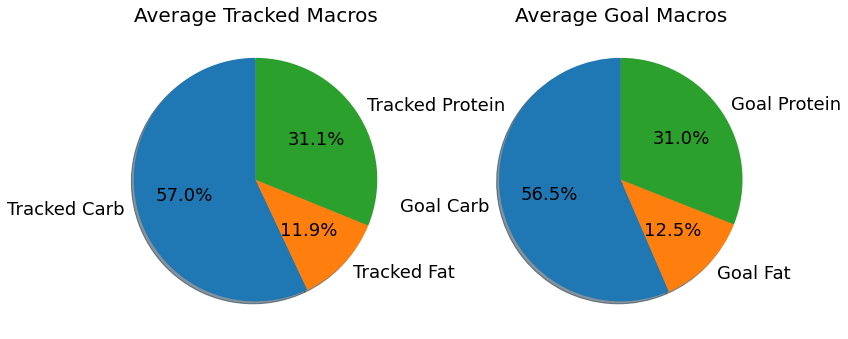

In [34]:
tracked_macros = np.array([bodycomp_df_clean['Tracked Carb'].mean(),bodycomp_df_clean['Tracked Fat'].mean(),bodycomp_df_clean['Tracked Protein'].mean()])
goal_macros = np.array([bodycomp_df_clean['Goal Carb'].mean(),bodycomp_df_clean['Goal Fat'].mean(),bodycomp_df_clean['Goal Protein'].mean()])
labels1 = ['Tracked Carb','Tracked Fat','Tracked Protein']
labels2 = ['Goal Carb','Goal Fat','Goal Protein']

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,8))

ax[0].pie(tracked_macros, labels = labels1, autopct = '%1.1f%%', shadow = True, startangle=90, textprops={'fontsize': 18})
ax[0].set_title('Average Tracked Macros', fontsize =20)
ax[1].pie(goal_macros, labels = labels2, autopct = '%1.1f%%', shadow = True, startangle=90, textprops={'fontsize': 18})
ax[1].set_title('Average Goal Macros', fontsize =20)

plt.show()

<h4> On Average How Many Times Did I Miss the Protein Intake

In [30]:
len(bodycomp_df_clean)/(len(bodycomp_df_clean[bodycomp_df_clean['Tracked Protein'] <= bodycomp_df_clean['Goal Protein']]))

2.4

<h4> Plotting Macro Intake Over Time

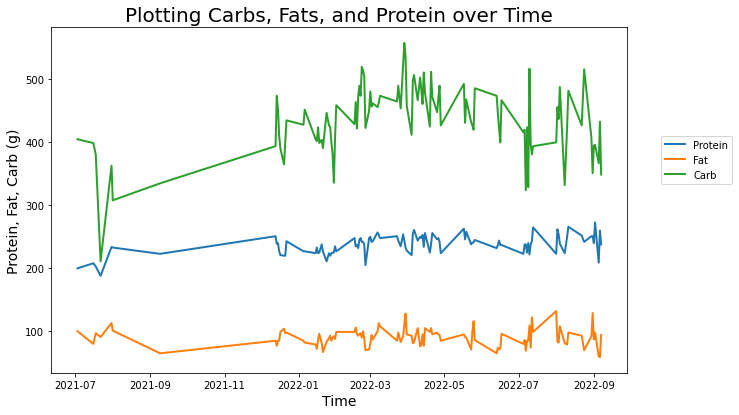

In [32]:
fig = plt.figure(figsize = (10,6))

axes = fig.add_axes([0.1,0.1,0.8,0.8])

axes.plot(bodycomp_df_clean['Date'], bodycomp_df_clean['Tracked Protein'], label = 'Protein', lw =2)
axes.plot(bodycomp_df_clean['Date'], bodycomp_df_clean['Tracked Fat'], label = 'Fat', lw =2)
axes.plot(bodycomp_df_clean['Date'], bodycomp_df_clean['Tracked Carb'], label = 'Carb', lw =2)

axes.set_xlabel('Time', fontsize =14)
axes.set_ylabel('Protein, Fat, Carb (g)', fontsize =14)
axes.set_title('Plotting Carbs, Fats, and Protein over Time', fontsize =20)

axes.legend(bbox_to_anchor = (1.05,0.7))

plt.show()

In [33]:
bodycomp_df_clean.iplot(x = 'Date', y = ['Tracked Protein', 'Tracked Fat', 'Tracked Carb'])

<h2> Weight Analysis

<h4>Heaviest Weight Fully Tracking</h4>

In [23]:
bodycomp_df_clean[bodycomp_df_clean['Weight (lb/kg)'] == bodycomp_df_clean['Weight (lb/kg)'].max()]

,index,Date,Weight (lb/kg),Tracked Calories,Tracked Carb,Tracked Fat,Tracked Protein,Eat Out (Y/N)?,Hours of quality sleep,Goal Calories,Goal Carb,Goal Fat,Goal Protein
101,483,2022-08-30 00:00:00,225.6,3453.0,407.0,92.0,251.0,N,5.5,3400,380.0,100.0,245.0


<h4>Heaviest Weight Not Fully Tracking</h4>

In [24]:
bodycomp_df_unclean[bodycomp_df_unclean['Weight (lb/kg)'] == bodycomp_df_unclean['Weight (lb/kg)'].max()]

,Date,Weight (lb/kg),Calories,Carb,Fat,Protein,Eat Out (Y/N)?,Hours of quality sleep,Goal Calories,Carb.1,Fat.1,Protein.1
483,2022-08-30 00:00:00,225.6,NaN,NaN,NaN,NaN,N,5.5,3400,NaN,NaN,NaN


<h4> Average Weight

In [25]:
bodycomp_df_clean['Weight (lb/kg)'].mean().round()

215.0

<h4>Total Weight Gain From Lightest to Heaviest

In [26]:
(bodycomp_df_clean['Weight (lb/kg)'].max()) - (bodycomp_df_clean['Weight (lb/kg)'].min())

18.799999999999983

<h2> Sleep Analysis

<h4> Average Hours of Quality Sleep </h4>

In [27]:
bodycomp_df_clean['Hours of quality sleep'].mean()

6.764351851851853

<h4> Plotting Sleep Over Time

Text(0.5, 1.0, 'Plotting Sleep Over Time')

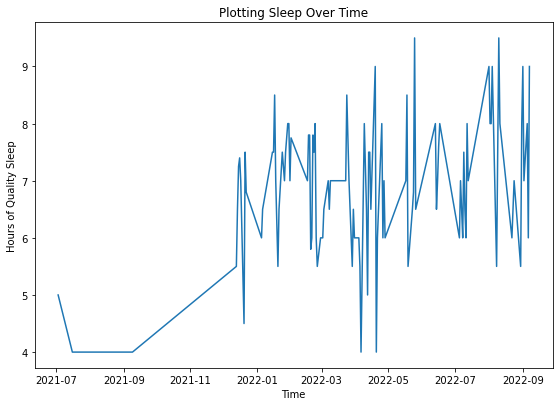

In [31]:
fig = plt.figure(figsize = (9,6))

axes = fig.add_axes([0.1,0.1,0.8,0.8])

axes.plot(bodycomp_df_clean['Date'], bodycomp_df_clean['Hours of quality sleep'])
axes.set_xlabel('Time')
axes.set_ylabel('Hours of Quality Sleep')
axes.set_title('Plotting Sleep Over Time')

<h4> Distribution of Total Sleep

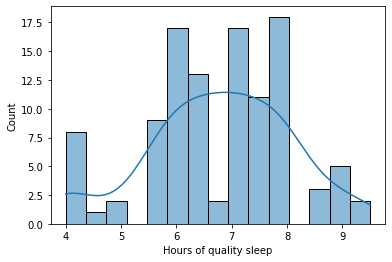

In [35]:
sns.histplot(bodycomp_df_clean['Hours of quality sleep'], bins = 15, kde = True)

plt.show()

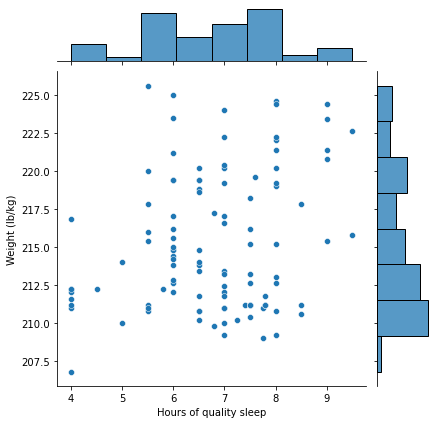

In [36]:
sns.jointplot(x = 'Hours of quality sleep', y = 'Weight (lb/kg)', data = bodycomp_df_clean)

plt.show()

<h2>Out to Eat Analysis

In [45]:
avg_pro_outtoeat = bodycomp_df_clean[(bodycomp_df_clean['Eat Out (Y/N)?'] == 'Y')]
avg_pro_outtoeat

,index,Date,Weight (lb/kg),Tracked Calories,Tracked Carb,Tracked Fat,Tracked Protein,Eat Out (Y/N)?,Hours of quality sleep,Goal Calories,Goal Carb,Goal Fat,Goal Protein
22,230,2022-01-21 00:00:00,210.8,3000.0,391.0,67.0,227.0,Y,6.5,3290,400.0,90.0,220.0
23,234,2022-01-24 00:00:00,213.2,3329.0,447.0,83.0,211.0,Y,7.5,3290,400.0,90.0,220.0
45,282,2022-03-07 00:00:00,213.4,3715.0,456.0,100.0,257.0,Y,7.0,3655,455.0,95.0,245.0
58,320,2022-04-09 00:00:00,213.0,3610.0,467.0,105,244.0,Y,8.0,3655,455.0,95.0,245.0
65,332,2022-04-20 00:00:00,216.8,3922.0,512.0,105,238.0,Y,4.0,3655,455.0,95.0,245.0
70,341,2022-04-28 00:00:00,217.0,3410.0,427.0,85.0,224.0,Y,6.0,3655,455.0,95.0,245.0


<h4> How Many Times Did I Go Out To Eat (Clean Data)

In [46]:
len(avg_pro_outtoeat)

6

<h4> How Many Times Did I Go Out To Eat (Unclean Data)

In [39]:
len(bodycomp_df_unclean[(bodycomp_df_unclean['Eat Out (Y/N)?'] == 'Y')])

8

<h4> Average Protein Intake while Eating Out

In [52]:
avg_pro_outtoeat['Tracked Protein'].mean().round()

234.0

<h4> Average Calorie Intake while Eating Out

In [51]:
avg_pro_outtoeat['Tracked Calories'].mean().round()

3498.0

<h4> Is Tracked Protein for Going Out greater than or less than Everyday Tracking

Comparing Averages

In [56]:
def is_greater(Out_to_Eat,Normal):
    if  Out_to_Eat > Normal:
        return "On average, going out to eat has a greater protein intake as a normal tracking day"
    elif Out_to_Eat == Normal:
        return "On average, going out to eat has equal protein intake as a normal tracking day"
    else:
        return "On average, going out to eat has less protein intake as a normal tracking day"

In [57]:
is_greater(avg_pro_outtoeat['Tracked Protein'].mean(),bodycomp_df_clean['Tracked Protein'].mean())

'On average, going out to eat has less protein intake as a normal tracking day'